In [1]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import Tekno as tk
import Types as tp
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd

In [3]:
import importlib #for reloading
importlib.reload(tk)
import Tekno as tk

# Parameters

materially and geometrically nonlinear finite element analysis to determine the ultimate load of the grid shell

grid shells with various span (L), span-to-height ratio (L/H), and pipe cross-section sizes (D, T)

to see results either load previously calculated and saved results or run analysis

In [4]:
Span   = 40  # m span of two-member structure
gN     = 16  # number of triangles along each span  
nb     = 4   # number of finite elements along one beam

In [5]:
GRStemp = tp.GridShell(Span, Span/8, 200, 5, gN, nb)
tk.CreateGeom(GRStemp)
tk.EqProperties(GRStemp)
GRStemp.Lav

3.9311520318227888

# Load results

In [6]:
with pd.HDFStore(mainpath+'/Saved results/OM_LpH.h5') as store:
    r1OM = store['r1OM'].values
    f1OM = store['f1OM'].values
    r2OM = store['r2OM'].values
    f2OM = store['f2OM'].values
    r3OM = store['r3OM'].values
    f3OM = store['f3OM'].values
    r4OM = store['r4OM'].values
    f4OM = store['f4OM'].values
    r5OM = store['r5OM'].values
    f5OM = store['f5OM'].values
    r6OM = store['r6OM'].values
    f6OM = store['f6OM'].values
    CapacityF=store['CapacityF']
    Capacity=store['Capacity']
    Mmax=store['Mmax']
    Nmin=store['Nmin']
    Nmax=store['Nmax']
    Dmax=store['Dmax']
    rhoA=store['rhoA']
    eqBA=store['eqBA']
    eqTA=store['eqTA']
    EA=store['EA']
    TA=store['TA']
    DA=store['DA']
    tA=store['tA']
    AA=store['AA']
    rhoA2=store['rhoA2']
    CapacityF2=store['CapacityF2']
    Capacity2=store['Capacity2']
    Mmax2=store['Mmax2']
    Nmin2=store['Nmin2']
    Nmax2=store['Nmax2']
    Dmax2=store['Dmax2']
    rhoA3=store['rhoA3']
    CapacityF3=store['CapacityF3']
    Capacity3=store['Capacity3']
    Mmax3=store['Mmax3']
    Nmin3=store['Nmin3']
    Nmax3=store['Nmax3']
    Dmax3=store['Dmax3']

KeyError: 'No object named CapacityF in the file'

# Analysis

In [115]:
n=14 # mm CHS cross-section diameter
DStart=100
DStep=50
m=2 # mm CHS cross-section thickness
tStart=10
tStep=10
print('D: ',np.arange(DStart,DStart+n*DStep,DStep))
print('t: ',np.arange(tStart,tStart+m*tStep,tStep))

D:  [100 150 200 250 300 350 400 450 500 550 600 650 700 750]
t:  [10 20]


In [116]:
MatNL = True

In [117]:
nm=n*m
CapacityF=np.zeros(nm)
Capacity=np.zeros(nm)
Mmax=np.zeros(nm)
Nmin=np.zeros(nm)
Nmax=np.zeros(nm)
Dmax=np.zeros(nm)
rhoA=np.zeros(nm)
eqBA = np.zeros(nm)
eqTA = np.zeros(nm)
EA = np.zeros(nm)
TA = np.zeros(nm)
DA = np.zeros(nm)
tA = np.zeros(nm)
AA = np.zeros(nm)
rhoA2=np.zeros(nm)
CapacityF2=np.zeros(nm)
Capacity2=np.zeros(nm)
Mmax2=np.zeros(nm)
Nmin2=np.zeros(nm)
Nmax2=np.zeros(nm)
Dmax2=np.zeros(nm)
rhoA3=np.zeros(nm)
CapacityF3=np.zeros(nm)
Capacity3=np.zeros(nm)
Mmax3=np.zeros(nm)
Nmin3=np.zeros(nm)
Nmax3=np.zeros(nm)
Dmax3=np.zeros(nm)

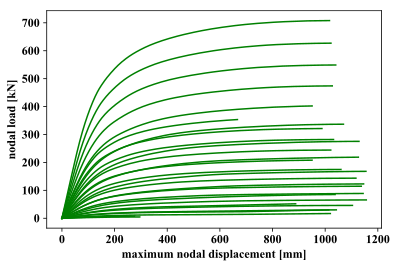

In [169]:
LperH = 8
Height = Span/LperH   # m height at apex
Fz = -800.; #kN
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        DA[k]=D
        t=tStart+tStep*j
        tA[k]=t
        GRS = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS)
        GRS.SupType=2 #oldalnyomasmentes
        GRS.MatNL=MatNL
        tk.BuildOpsModel(GRS)
        GRS.Steps = 200
        GRS.MinStepSize = 0.01
        disp, force, ID, loadA, ok = tk.Analyze(GRS, Fz, 1, 0)
        if ok:
            CapacityF[k]=loadA[-1]  #kN
            Capacity[k]=loadA[-1]*GRS.nbnBns/GRS.span**2  #kN/m2
            rhoA[k]=tk.EqProperties(GRS)
            Dmax[k],Nmin[k],Nmax[k],Mmax[k],nminid, nmaxid, mid,_=tk.GetResults(disp, force);
            eqBA[k] = GRS.eqB
            eqTA[k] = GRS.eqT
            EA[k] = GRS.Eeq
            TA[k] = GRS.teq
            AA[k] = GRS.secA
            _ = plt.plot(disp[:,ID,2],loadA, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

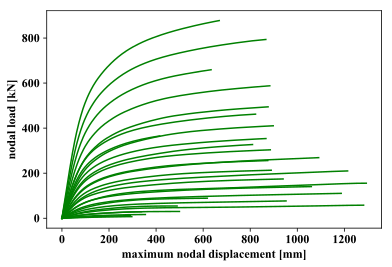

In [128]:
LperH = 5
Height = Span/LperH   # m height at apex
Fz = -900.; #kN
#GRS2.Steps = 100
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        t=tStart+tStep*j
        GRS2 = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS2)
        GRS2.SupType=2 #oldalnyomasmentes
        GRS2.MatNL=MatNL
        tk.BuildOpsModel(GRS2)
        GRS2.Steps = 200
        GRS2.MinStepSize = 0.01
        disp2, force2, ID2, loadA2, ok=tk.Analyze(GRS2, Fz, 1, 0)
        if ok:
            rhoA2[k]=tk.EqProperties(GRS2)
            CapacityF2[k]=loadA2[-1]  #kN
            Capacity2[k]=loadA2[-1]*GRS2.nbnBns/GRS2.span**2  #kN/m2
            Dmax2[k],Nmin2[k],Nmax2[k],Mmax2[k],nminid, nmaxid, mid,_=tk.GetResults(disp2, force2);
            _ = plt.plot(disp2[:,ID2,2],loadA2, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

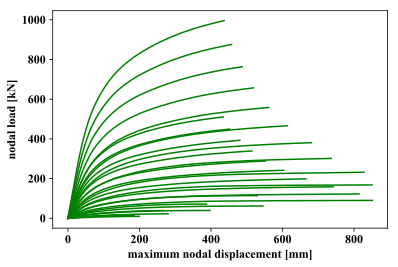

In [143]:
LperH = 3
Height = Span/LperH   # m height at apex
Fz = -1200.; #kN
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        t=tStart+tStep*j
        GRS3 = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS3)
        GRS3.SupType=2 #oldalnyomasmentes
        GRS3.MatNL=MatNL
        tk.BuildOpsModel(GRS3)
        GRS3.Steps = 200
        GRS3.MinStepSize = 0.01
        disp3, force3, ID3, loadA3, ok=tk.Analyze(GRS3,Fz, 1, 0)
        if ok:
            rhoA3[k]=tk.EqProperties(GRS3)
            CapacityF3[k]=loadA3[-1]  #kN
            Capacity3[k]=loadA3[-1]*GRS3.nbnBns/GRS3.span**2  #kN/m2
            Dmax3[k],Nmin3[k],Nmax3[k],Mmax3[k],nminid, nmaxid, mid,_=tk.GetResults(disp3, force3);
            _ = plt.plot(disp3[:,ID2,2],loadA3, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

# Results

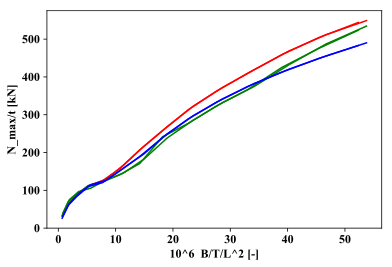

In [171]:
plt.plot(rhoA[::2]*1e6,Nmax[::2]/10,'r-', ms=5) # L/H=8
plt.plot(rhoA[1::2]*1e6,Nmax[1::2]/20,'r-', ms=5) # L/H=8
plt.plot(rhoA2[::2]*1e6,Nmax2[::2]/10,'g-', ms=5) # L/H=5
plt.plot(rhoA2[1::2]*1e6,Nmax2[1::2]/20,'g-', ms=5) # L/H=5
plt.plot(rhoA3[::2]*1e6,Nmax3[::2]/10,'b-', ms=5) # L/H=3
plt.plot(rhoA3[1::2]*1e6,Nmax3[1::2]/20,'b-', ms=5) # L/H=3
plt.xlabel('10^6  B/T/L^2 [-]')
plt.ylabel('N_max/t [kN]')
plt.show()

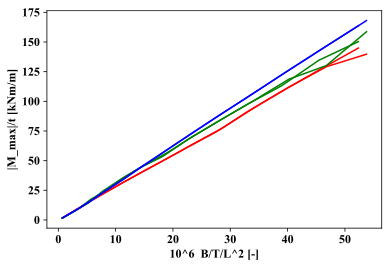

In [172]:
plt.plot(rhoA[::2]*1e6,Mmax[::2]/10,'r-', ms=5) # L/H=8
plt.plot(rhoA[1::2]*1e6,Mmax[1::2]/20,'r-', ms=5) # L/H=8
plt.plot(rhoA2[::2]*1e6,Mmax2[::2]/10,'g-', ms=5) # L/H=5
plt.plot(rhoA2[1::2]*1e6,Mmax2[1::2]/20,'g-', ms=5) # L/H=5
plt.plot(rhoA3[::2]*1e6,Mmax3[::2]/10,'b-', ms=5) # L/H=3
plt.plot(rhoA3[1::2]*1e6,Mmax3[1::2]/20,'b-', ms=5) # L/H=3
plt.xlabel('10^6  B/T/L^2 [-]')
plt.ylabel('|M_max|/t [kNm/m]')
plt.show()

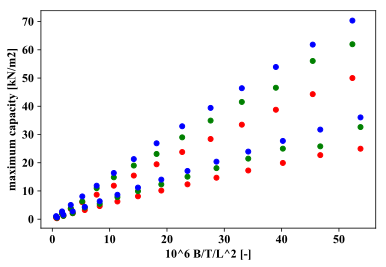

In [173]:
plt.plot(rhoA[::2]*1e6,Capacity[::2],'ro', ms=5) # L/H=8
plt.plot(rhoA[1::2]*1e6,Capacity[1::2],'ro', ms=5) # L/H=8
plt.plot(rhoA2[::2]*1e6,Capacity2[::2],'go', ms=5) # L/H=5
plt.plot(rhoA2[1::2]*1e6,Capacity2[1::2],'go', ms=5) # L/H=5
plt.plot(rhoA3[::2]*1e6,Capacity3[::2],'bo', ms=5) # L/H=3
plt.plot(rhoA3[1::2]*1e6,Capacity3[1::2],'bo', ms=5) # L/H=3
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity [kN/m2]')
plt.show()

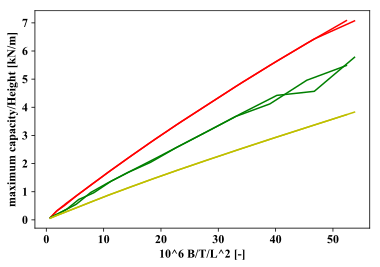

In [177]:
plt.plot(rhoA[::2]*1e6,CapacityF[::2]/GRS.height/10,'r', ms=5) # L/H=8
plt.plot(rhoA[1::2]*1e6,CapacityF[1::2]/GRS.height/20,'r', ms=5) # L/H=5
plt.plot(rhoA2[::2]*1e6,CapacityF2[::2]/GRS2.height/10,'g', ms=5) # L/H=3
plt.plot(rhoA2[1::2]*1e6,CapacityF2[1::2]/GRS2.height/20,'g', ms=5) # L/H=8
plt.plot(rhoA3[::2]*1e6,CapacityF3[::2]/GRS3.height/10,'y', ms=5) # L/H=5
plt.plot(rhoA3[1::2]*1e6,CapacityF3[1::2]/GRS3.height/20,'y', ms=5) # L/H=3
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity/Height [kN/m]')
plt.show()

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(rhoA[::2]*1e6,CapacityF[::2]/GRS.Lav/10,'ro-', ms=5) # L/H=8
plt.plot(rhoA[1::2]*1e6,CapacityF[1::2]/GRS.Lav/20,'ro', ms=5) # L/H=8
plt.plot(rhoA2[::2]*1e6,CapacityF2[::2]/GRS2.Lav/10,'g', ms=5) # L/H=5
plt.plot(rhoA2[1::2]*1e6,CapacityF2[1::2]/GRS2.Lav/20,'g', ms=5) # L/H=5
plt.plot(rhoA3[::2]*1e6,CapacityF3[::2]/GRS3.Lav/10,'b', ms=5) # L/H=3
plt.plot(rhoA3[1::2]*1e6,CapacityF3[1::2]/GRS3.Lav/20,'b', ms=5) # L/H=3
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity/Lav/t [kN/m]')
plt.show()

NameError: name 'rhoA' is not defined

# Save results

In [178]:
r1OM=rhoA[::2]
f1OM=CapacityF[::2]/GRS.Lav/10
r2OM=rhoA[1::2]
f2OM=CapacityF[1::2]/GRS.Lav/20
r3OM=rhoA2[::2]
f3OM=CapacityF2[::2]/GRS2.Lav/10
r4OM=rhoA2[1::2]
f4OM=CapacityF2[1::2]/GRS2.Lav/20
r5OM=rhoA3[::2]
f5OM=CapacityF3[::2]/GRS3.Lav/10
r6OM=rhoA3[1::2]
f6OM=CapacityF3[1::2]/GRS3.Lav/20

In [179]:
A_df = pd.DataFrame(r1OM)
B_df = pd.DataFrame(f1OM)
C_df = pd.DataFrame(r2OM)
D_df = pd.DataFrame(f2OM)
E_df = pd.DataFrame(r3OM) 
F_df = pd.DataFrame(f3OM) 
G_df = pd.DataFrame(r4OM) 
H_df = pd.DataFrame(f4OM) 
I_df = pd.DataFrame(r5OM) 
J_df = pd.DataFrame(f5OM) 
K_df = pd.DataFrame(r6OM) 
L_df = pd.DataFrame(f6OM) 

with pd.HDFStore(mainpath+'/Saved results/OM_LpH.h5') as store:
    store['r1OM'] = A_df
    store['f1OM'] = B_df
    store['r2OM'] = C_df
    store['f2OM'] = D_df
    store['r3OM'] = E_df
    store['f3OM'] = F_df
    store['r4OM'] = G_df
    store['f4OM'] = H_df
    store['r5OM'] = I_df
    store['f5OM'] = J_df
    store['r6OM'] = K_df
    store['f6OM'] = L_df